In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from utils import *
import glob

In [2]:
from scipy import stats

In [3]:
def findlims(xs,xcs,qq=0.05):
    xmin=min(*[np.quantile(x,qq) for x in xs],*[x.min() for x in xcs])
    xmax=max(*[np.quantile(x,1-qq) for x in xs],*[x.max() for x in xcs])
    dx=xmax-xmin
    return xmin-0.02*dx,xmax+0.02*dx

def cplot(x,y,xc,yc,xmin,xmax,ymin,ymax):
    kernel=stats.gaussian_kde(np.array([x,y]))
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]  
    positions = np.vstack([X.ravel(), Y.ravel()])
    Z = np.reshape(kernel(positions).T, X.shape)
    
    plt.contourf(X,Y,Z,cmap='YlOrBr')
    plt.plot(xc,yc,'.',color='#1a658fff');

def cplot3(v1,v2,cce):
    yrs=[1860,2020,2090]
    xs=[cfs[v1]*ds[v1].sel(year=slice(yr-10,yr+10)).values.ravel() for yr in yrs]
    ys=[cfs[v2]*ds[v2].sel(year=slice(yr-10,yr+10)).values.ravel() for yr in yrs]
    yrs=[1850,2020,2090]
    xcs=[cfs[v1]*cce[v1].sel(year=yr).values for yr in yrs]
    ycs=[cfs[v2]*cce[v2].sel(year=yr).values for yr in yrs]
    xmin,xmax=findlims(xs,xcs)
    ymin,ymax=findlims(ys,ycs)
    
    i=0
    plt.figure(figsize=[15,4])
    for x,y,xc,yc in zip(xs,ys,xcs,ycs):
        
        plt.subplot(131+i)
        cplot(x,y,xc,yc,xmin,xmax,ymin,ymax)
        plt.title(yrs[i])
        plt.xlabel(v1)
        if i==0:
            plt.ylabel(v2)
        i+=1
    
    return xs,ys,xcs,ycs,yrs

In [4]:
f='/glade/derecho/scratch/djk2120/postp/jas/cce_era5_i04.nc'
cce=xr.open_dataset(f)

d='/glade/derecho/scratch/djk2120/postp/jas/'
dvs=[f.split('/')[-1].split('.')[0] for f in glob.glob(d+'*.1990.nc')]
ds=xr.Dataset()
for v in dvs:
    print(v)
    files=sorted(glob.glob(d+v+'*.nc'))
    ds[v]=xr.open_mfdataset(files,combine='by_coords')[v]

VP
PREC
PBLH
PRECL
RAIN
TWS
QSOIL
RH2M
GPP
FSDS
TLAI
FSH
TSA
QRUNOFF
NBP
TMQ
SNOW
VPD
PRECC
TREFHTMX
QVEGE
ET
EFLX_LH_TOT
QVEGT
SOILWATER_10CM


In [11]:
cfs={v:24*60*60*92 for v in ['PREC','ET','QRUNOFF']}
for v in ['PRECC','PRECL']:
    cfs[v]=24*60*60*92*1000
for v in ds.data_vars:
    if v not in cfs:
        cfs[v]=1


In [9]:
ds['ESAT']=ds.VP+ds.VPD
cce['ESAT']=cce.VP+cce.VPD

In [10]:
ds['EF']=ds.EFLX_LH_TOT/(ds.EFLX_LH_TOT+ds.FSH)
cce['EF']=cce.EFLX_LH_TOT/(cce.EFLX_LH_TOT+cce.FSH)

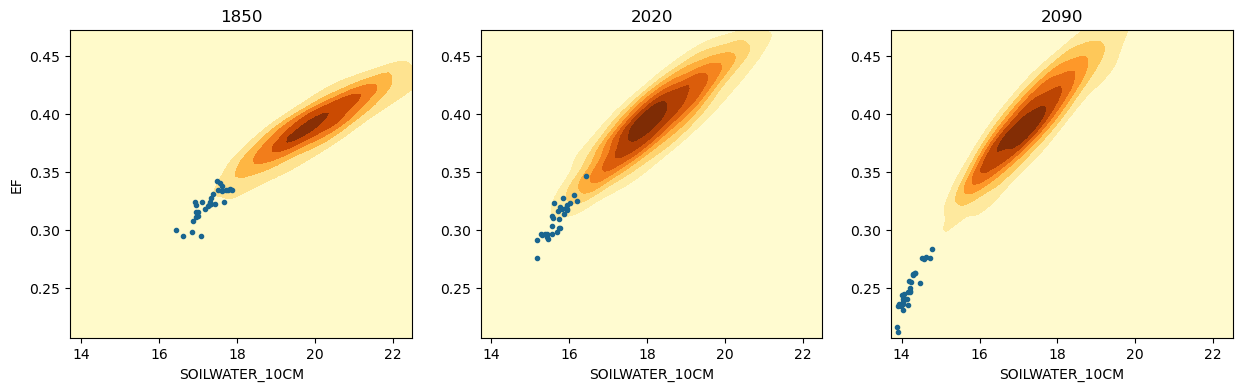

In [14]:
xs,ys,xcs,ycs,yrs=cplot3('SOILWATER_10CM','EF',cce)

In [56]:
x=xs[0]
p=ps[0]

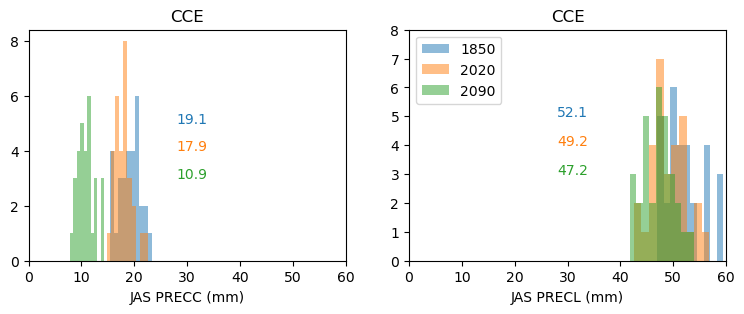

In [88]:
plt.figure(figsize=[9,3])
i=0
for x,y in zip(xcs,ycs):
    plt.subplot(121)
    plt.hist(x,alpha=0.5)
    plt.xlabel('JAS PRECC (mm)')
    plt.xlim([0,60])
    plt.text(28,5-i,np.round(x.mean(),1),color='C{}'.format(i))
    plt.title('CCE')
    plt.subplot(122)
    plt.hist(y,alpha=0.5)
    plt.xlabel('JAS PRECL (mm)')
    plt.xlim([0,60])
    plt.ylim([0,8])
    plt.text(28,5-i,np.round(y.mean(),1),color='C{}'.format(i))
    i+=1
    plt.title('CCE')
plt.legend(yrs,loc=2);
plt.savefig('../figs/hists/precc_cce.png',dpi=300,bbox_inches='tight')

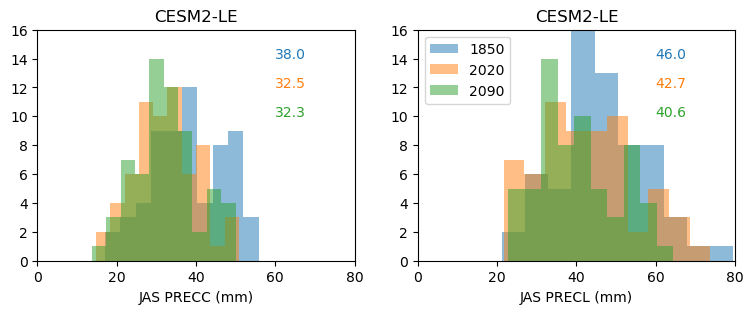

In [93]:
plt.figure(figsize=[9,3])
i=0
for x,y,sw in zip(xs,ys,sws):
    ix=sw<np.quantile(sw,0.03)
    plt.subplot(121)
    plt.hist(x[ix],alpha=0.5)
    plt.xlabel('JAS PRECC (mm)')
    plt.xlim([0,80])
    plt.ylim([0,16])
    plt.text(60,14-i*2,np.round(x[ix].mean(),1),color='C{}'.format(i))
    plt.title('CESM2-LE')
    plt.subplot(122)
    plt.hist(y[ix],alpha=0.5)
    plt.xlabel('JAS PRECL (mm)')
    plt.xlim([0,80])
    plt.ylim([0,16])
    plt.text(60,14-i*2,np.round(y[ix].mean(),1),color='C{}'.format(i))
    plt.title('CESM2-LE')
    i+=1
plt.legend(yrs,loc=2);
plt.savefig('../figs/hists/precc_lens2.png',dpi=300,bbox_inches='tight')

array([45.39703716, 49.22042349, 53.84384807, 38.70132302, 33.59304512,
       35.16158425, 37.70483217, 49.86002659, 32.15112075, 31.09951781,
       55.80909989, 54.86396334, 41.68731254, 25.69057941, 48.57908624,
       32.86101231, 48.10198558, 36.72878526, 36.48818631, 44.76385568,
       38.40454876, 36.9490793 , 35.50356657, 33.14313987, 31.87744311,
       33.64800035, 27.41609087, 36.36064177, 38.93609532, 30.38237012,
       28.7420587 , 44.0743394 , 41.67191285, 39.21933878, 39.69164482,
       49.45287589, 30.78551801, 20.91004741, 17.02791323, 38.1995394 ,
       24.9182813 , 40.00891803, 31.12035033, 44.29089785, 31.69757279,
       31.11273489, 48.74576021, 50.12498247, 23.21373233, 33.30256686,
       50.11045479, 24.35169945, 43.35175032, 39.00858047, 45.81199065,
       24.85424839, 45.47291069, 17.65952738, 49.05948547, 36.20887881,
       44.30046515, 44.80128253, 45.95076479])

In [100]:
vvs=[('SOILWATER_10CM','ET'),
     ('SOILWATER_10CM','PREC'),
     ('SOILWATER_10CM','TREFHTMX'),
     ('SOILWATER_10CM','VPD'),
     ('SOILWATER_10CM','VP'),
     ('ET','VPD'),
     ('ET','VP'),
     ('ET','TREFHTMX'),
     ('ET','PREC'),
     ('PBLH','PREC'),
     ('PBLH','PRECC'),
     ('PBLH','TMQ'),
     ('TMQ','PREC'),
     ('TREFHTMX','VPD'),
     ('TREFHTMX','VP'),
     ('TREFHTMX','TSA'),
     ('TREFHTMX','PREC'),
     ('TREFHTMX','PBLH'),
     ('TREFHTMX','PRECC'),
     ('TREFHTMX','ET'),
     ('PREC','QRUNOFF'),
     ('PRECC','PRECL')]

     

/glade/derecho/scratch/djk2120/tmp/ipykernel_20566/533960516.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=[15,4])


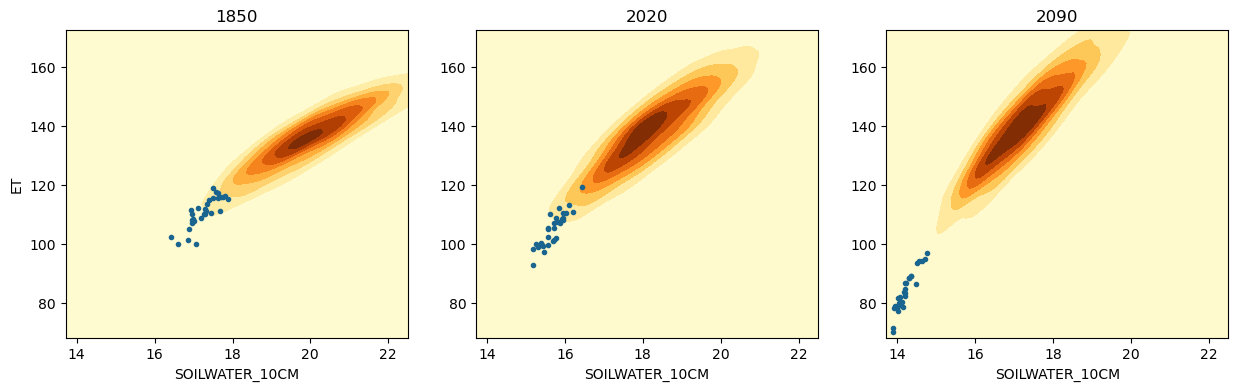

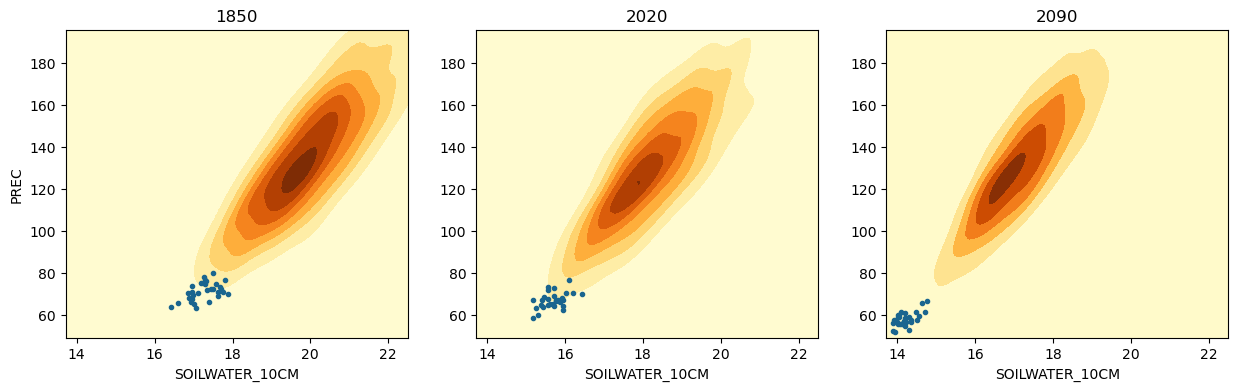

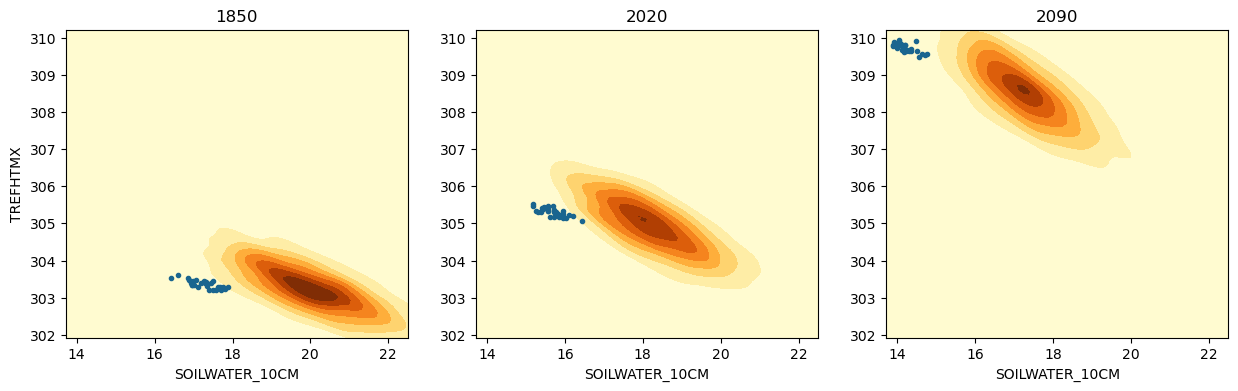

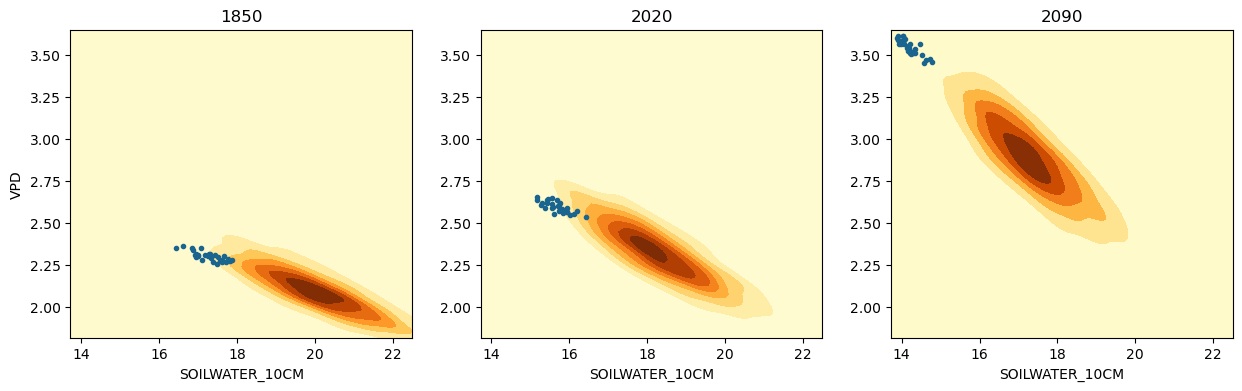

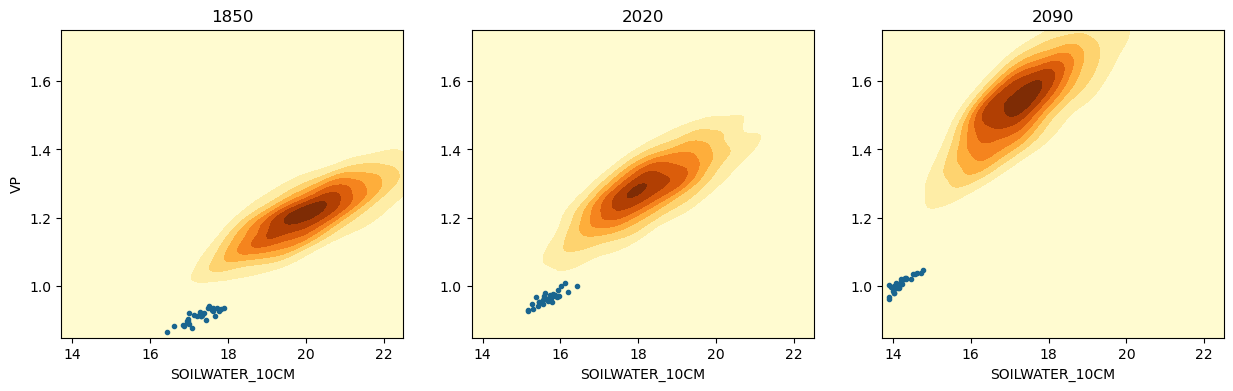

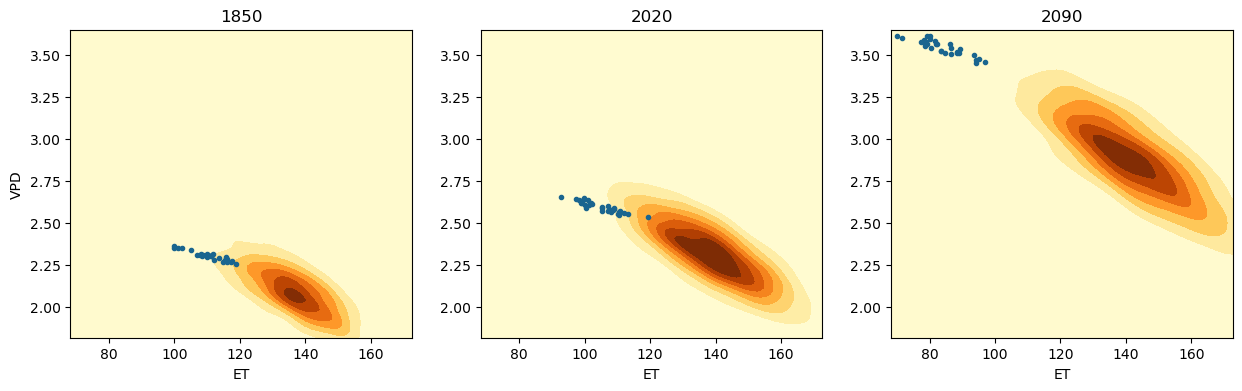

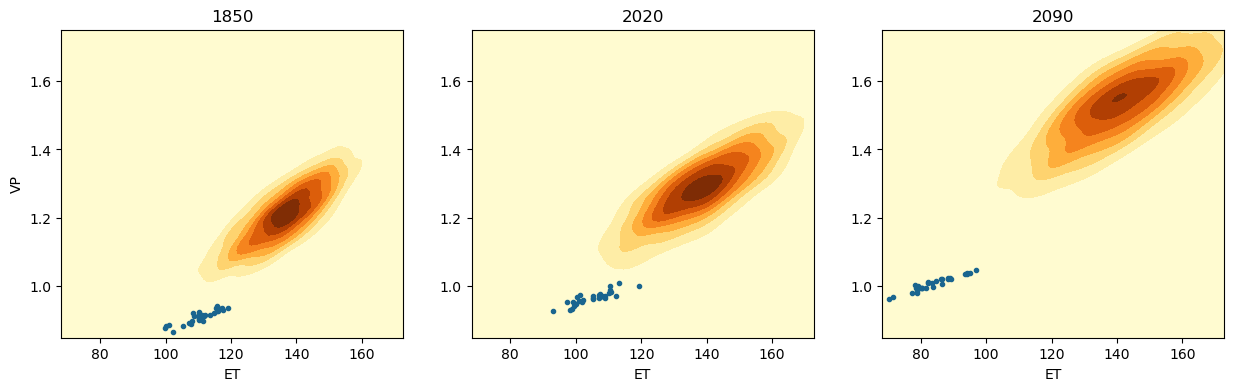

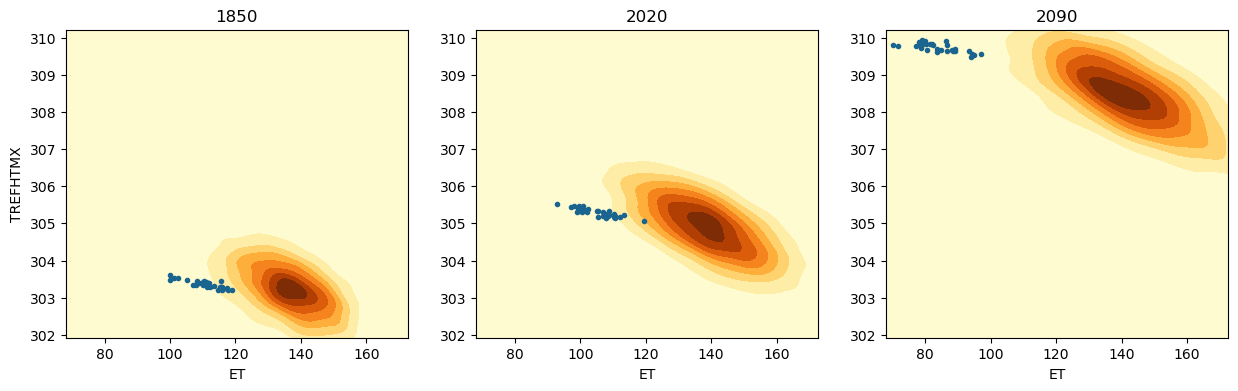

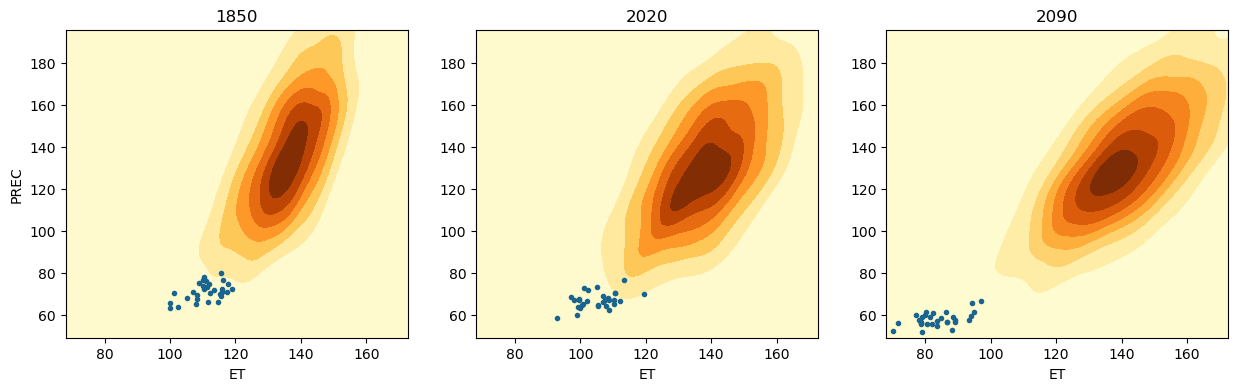

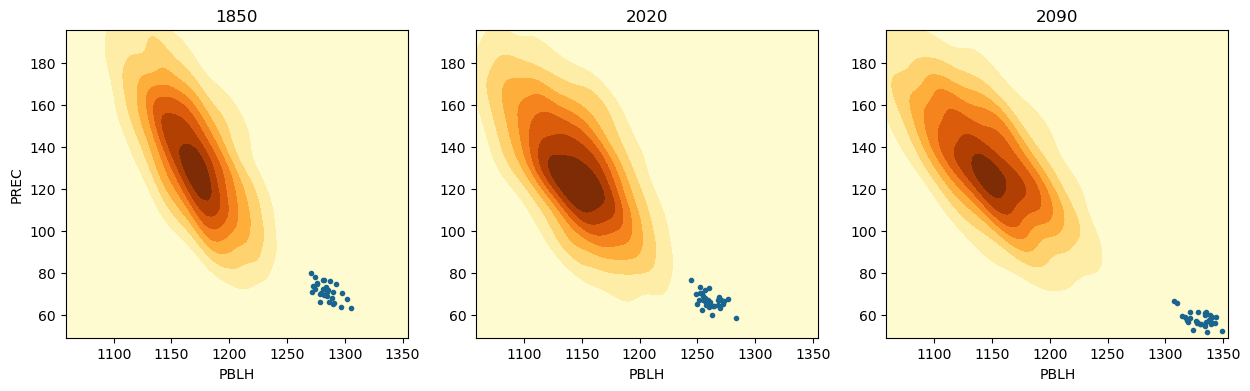

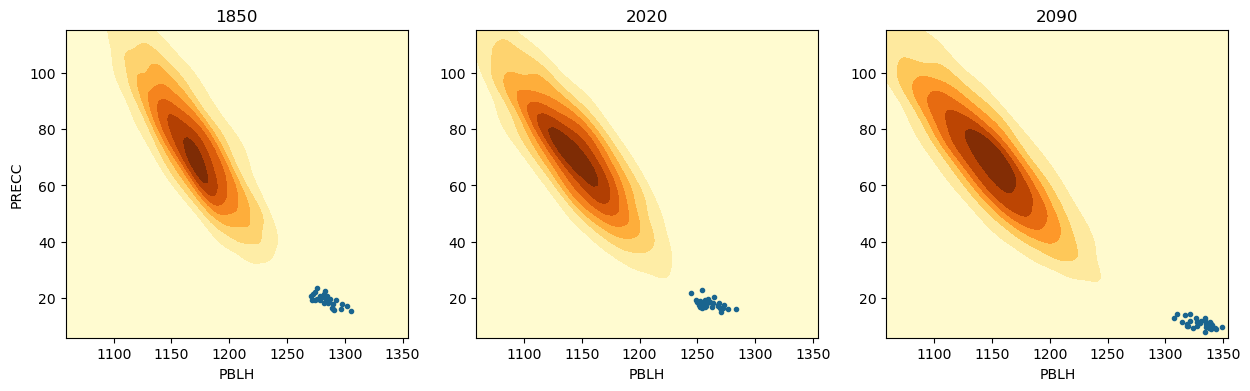

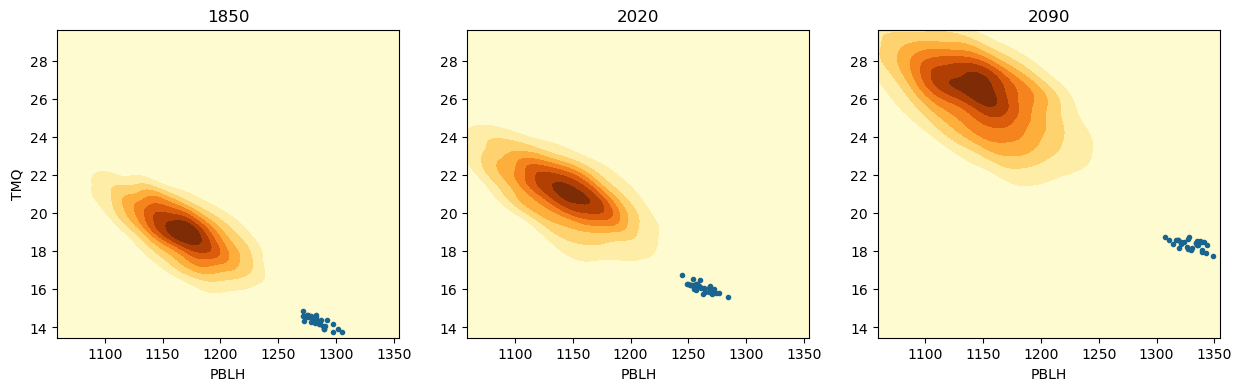

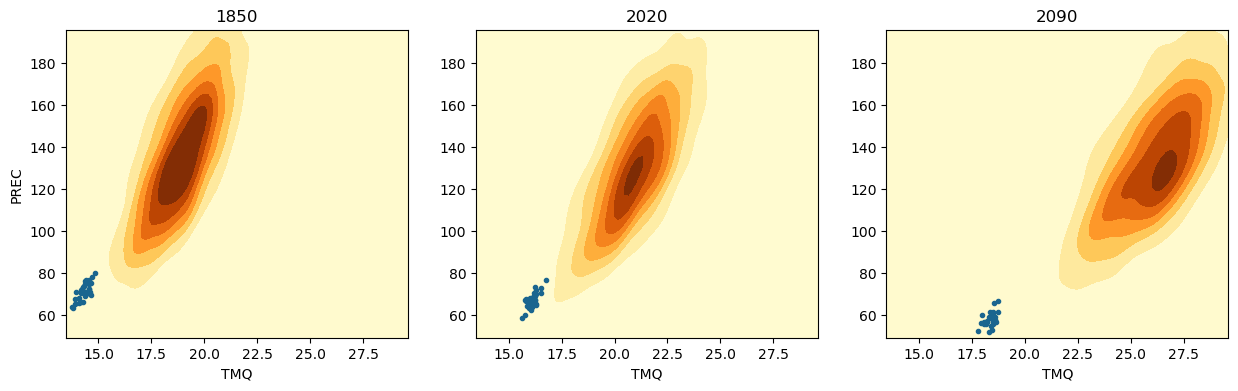

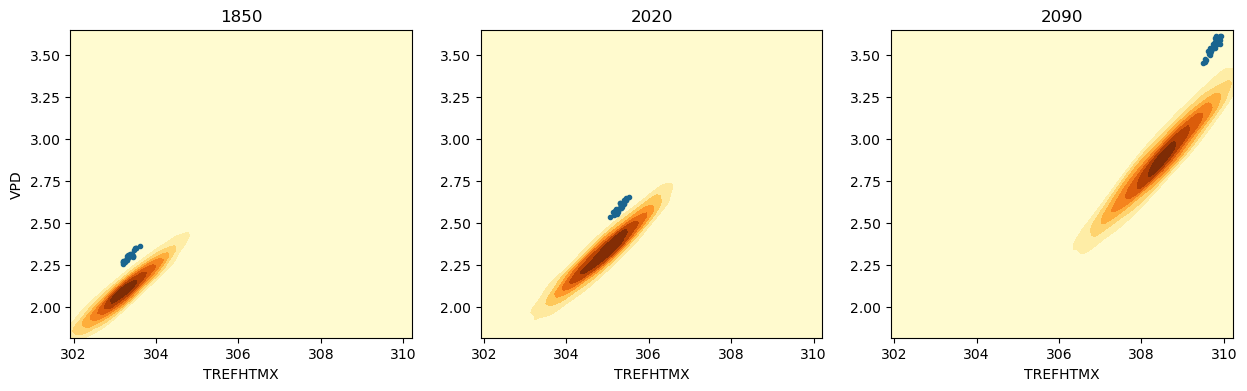

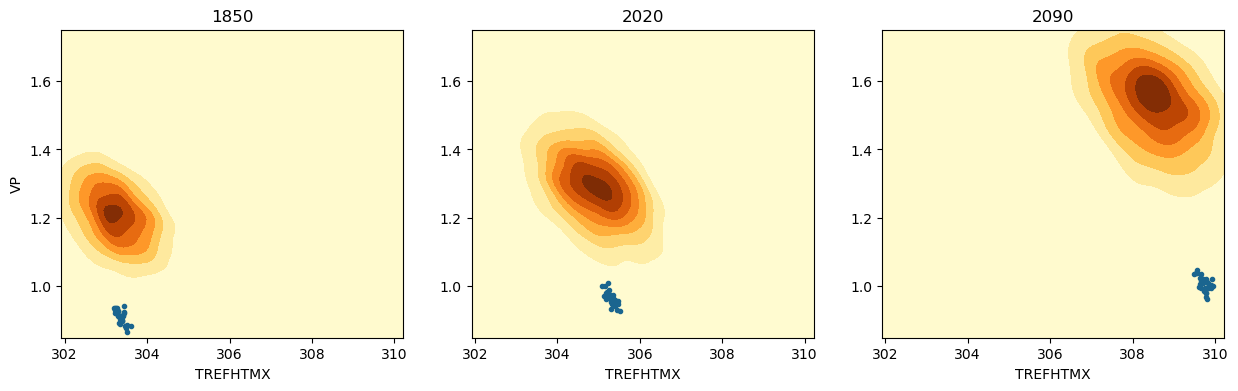

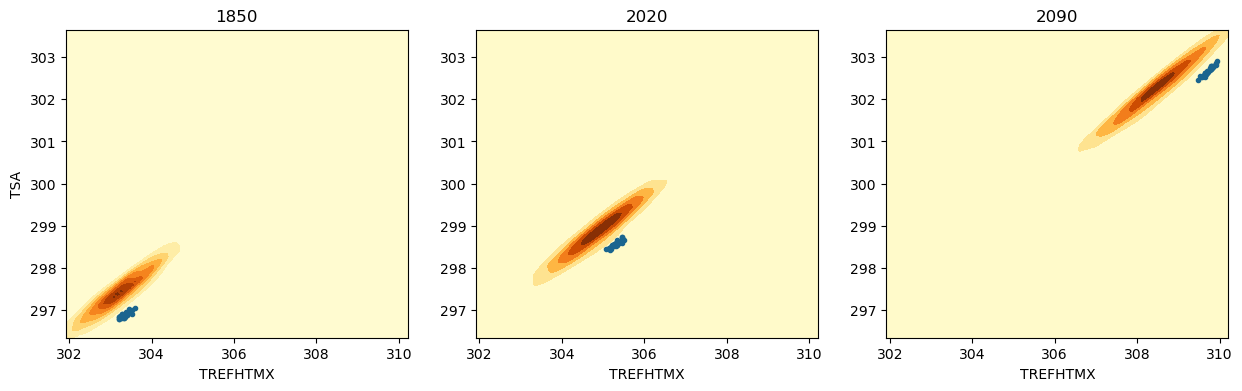

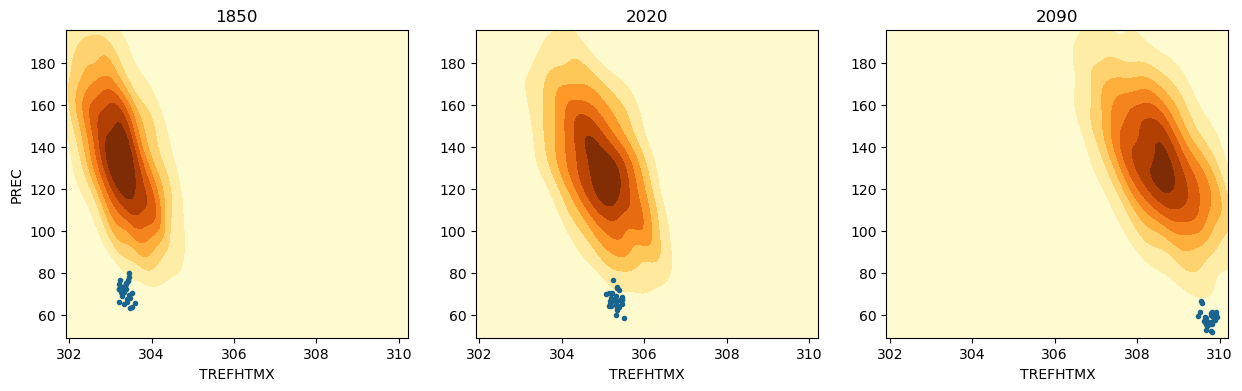

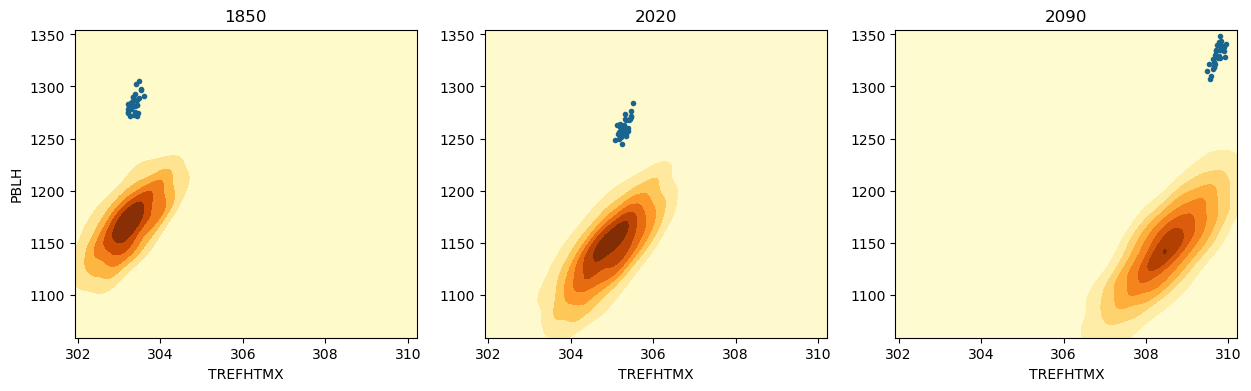

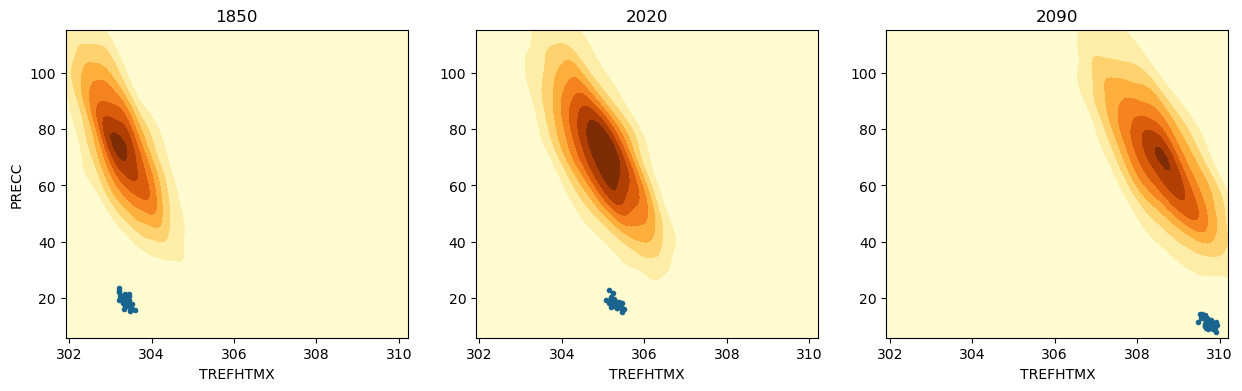

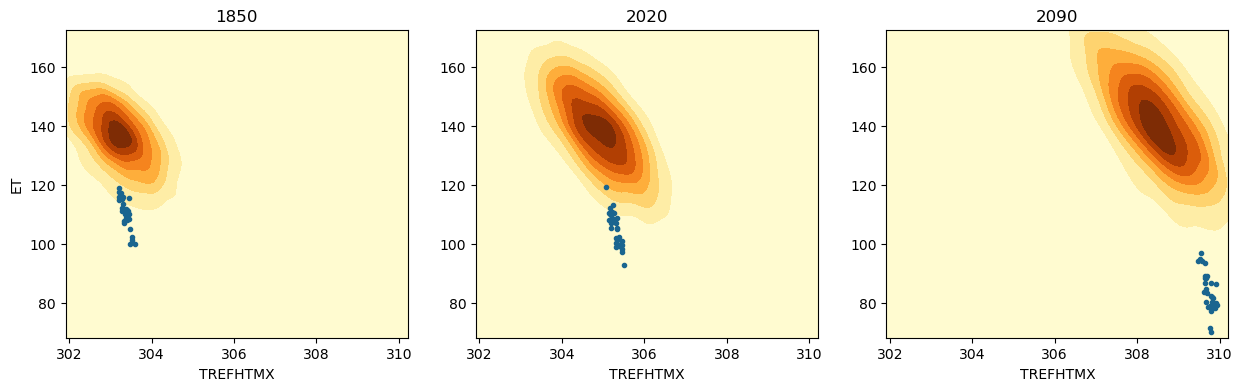

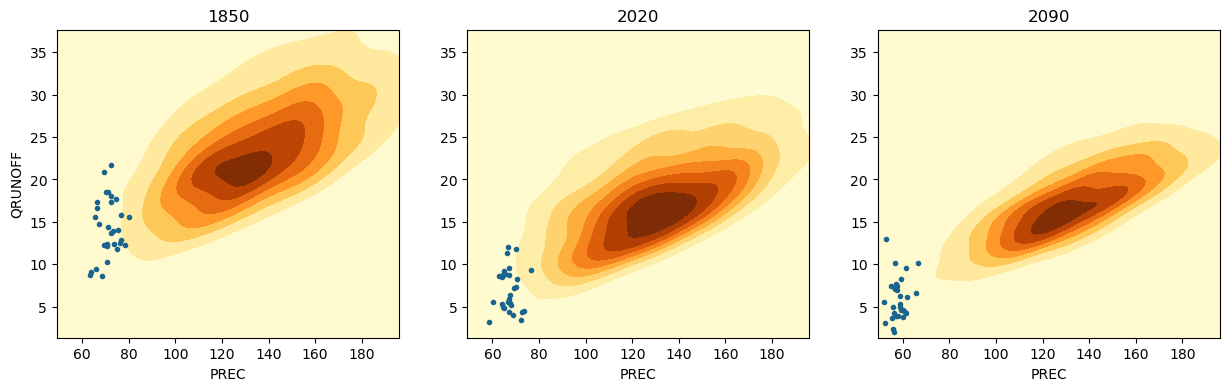

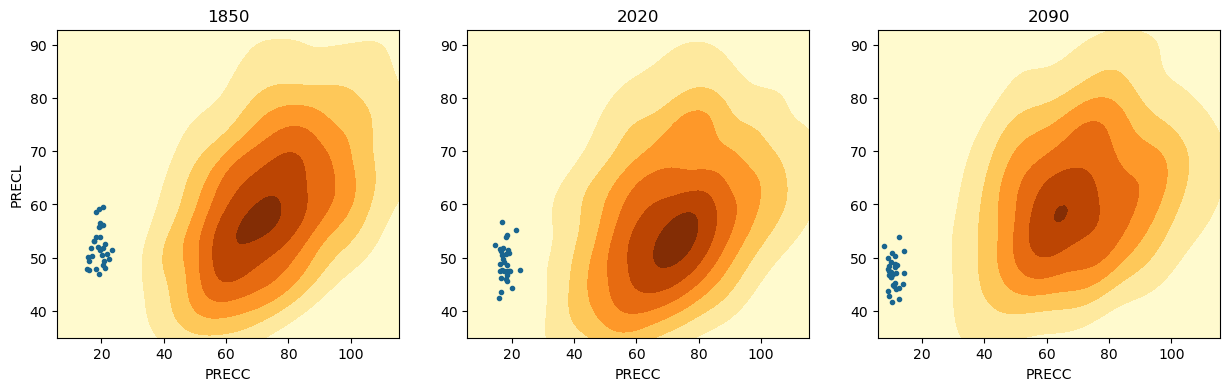

In [101]:
for vv in vvs:
    xs,ys,xcs,ycs,yrs=cplot3(vv[0],vv[1],cce)
    f='../figs/contours/'+vv[0]+'_'+vv[1]+'_'+'contours.png'
    plt.savefig(f,dpi=300,bbox_inches='tight')

In [56]:
print('year  quantile  dy    mdx   dy-mdx')
for x,y,xc,yc,yr in zip(xs,ys,xcs,ycs,yrs):
    m,b,r,p,stderr=stats.linregress(x,y)
    q=(x<xc.mean()).sum()/len(x)
    
    dy=yc.mean()-(m*np.quantile(x,0.5)+b)
    mdx=m*xc.mean()-m*np.quantile(x,0.5)
    resid=dy-mdx

    
    print(str(yr).ljust(7),
          str(np.round(q,2)).ljust(6),
          str(np.round(dy,2)).ljust(6),
          str(np.round(mdx,2)).ljust(6),
          np.round(resid,2))

year  quantile  dy    mdx   dy-mdx
1850    0.58   0.21   0.03   0.18
2020    0.67   0.27   0.08   0.18
2090    0.9    0.65   0.32   0.33


In [34]:
xc.mean()

303.35983404414947

In [35]:
np.quantile(x,0.5)

303.2256059424727

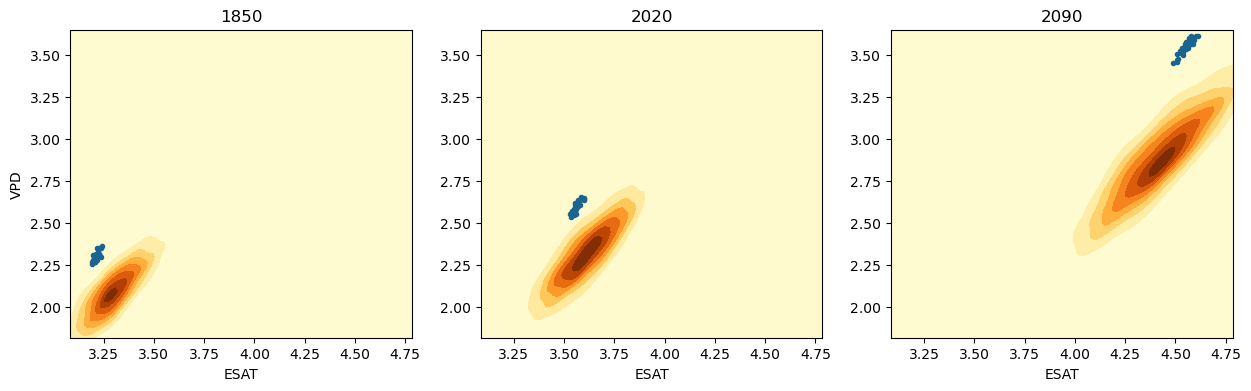

In [69]:
xs,ys,xcs,ycs,yrs=cplot3('ESAT','VPD',cce)

In [56]:
ds.VPD

<xarray.DataArray 'VPD' (year: 251, ens: 100)>
dask.array<concatenate, shape=(251, 100), dtype=float64, chunksize=(10, 100), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: ens

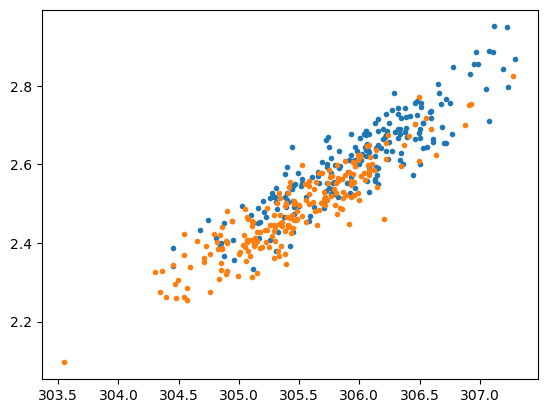

In [89]:
yr=2020
ixy=slice(yr-10,yr+10)
s=ds.SOILWATER_10CM.sel(year=ixy)


for i in range(2):
    ixd=(s>=s.quantile(i*0.1,dim='ens'))&(s<s.quantile(0.1+i*0.1,dim='ens'))
    x=ds.TREFHTMX.sel(year=ixy).T.where(ixd).values.ravel()
    xx=x[~np.isnan(x)]
    
    y=ds.VPD.sel(year=ixy).where(ixd).values.ravel()
    yy=y[~np.isnan(y)]
    plt.plot(xx,yy,'.')


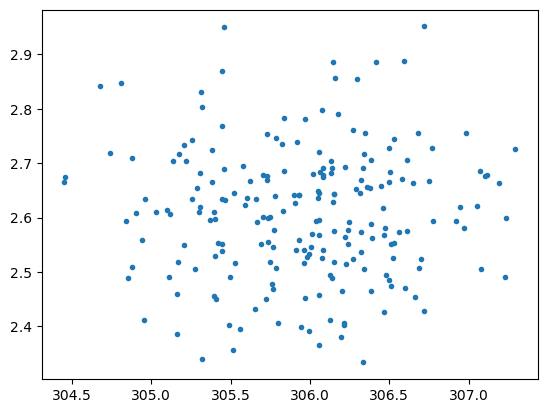

In [74]:
plt.plot(np.unique(x[~np.isnan(x)]),

array([304.45219965, 304.45606614, 304.67472617, 304.74124252,
       304.8065738 , 304.84163921, 304.85478982, 304.87852418,
       304.87880773, 304.90338784, 304.94091386, 304.95156403,
       304.95984811, 305.02873087, 305.09915872, 305.11383815,
       305.11804897, 305.13653557, 305.1608362 , 305.16155586,
       305.1663692 , 305.17726504, 305.20441661, 305.20559171,
       305.22139433, 305.2562221 , 305.25840657, 305.27351739,
       305.29005454, 305.30322561, 305.30537625, 305.30637083,
       305.31241565, 305.32026593, 305.32119777, 305.3732308 ,
       305.38163811, 305.38295253, 305.39222678, 305.3957964 ,
       305.39888712, 305.4015849 , 305.40789445, 305.4205294 ,
       305.44313447, 305.44428901, 305.44597891, 305.44704096,
       305.4484437 , 305.45628063, 305.45818338, 305.46557599,
       305.48886352, 305.4958684 , 305.51732338, 305.5213559 ,
       305.52496304, 305.55886212, 305.57944741, 305.58962695,
       305.60639137, 305.62070883, 305.65498992, 305.66

In [70]:
ixd.sum().values

array(210)

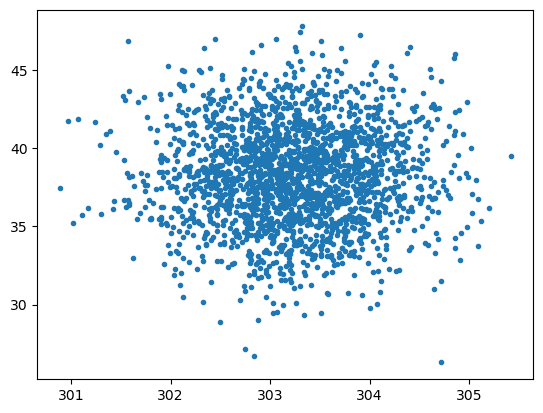

In [18]:
plt.plot(xs[0],ys[0],'.')

In [61]:
dvs=['RAIN','SNOW','QSOIL','QVEGE','QVEGT','EFLX_LH_TOT','SOILWATER_10CM','FSH','TSA','RH2M']


In [14]:
la=get_foco(dsets['2020'])*dsets['2020'].la

In [62]:
dsets={yr:get_ds(yr+'_wide',dvs) for yr in ['2020','2090']}
wide=xr.Dataset()
for v in dsets['2020'].data_vars:
    if v!='la':
        print(v)
        wide[v]=xr.concat([get_jas(dsets[yr][v],la) for yr in dsets],dim='year')

In [82]:
dsets={yr:get_ds(yr+'_wider',dvs) for yr in ['2020','2090']}
wider=xr.Dataset()
for v in dsets['2020'].data_vars:
    if v!='la':
        print(v)
        wider[v]=xr.concat([get_jas(dsets[yr][v],la) for yr in dsets],dim='year')

RAIN
SNOW
QSOIL
QVEGE
QVEGT
EFLX_LH_TOT
SOILWATER_10CM
FSH
TSA
RH2M
PREC
ET
VPD
VP


RAIN
SNOW
QSOIL
QVEGE
QVEGT
EFLX_LH_TOT
SOILWATER_10CM
FSH
TSA
RH2M
PREC
ET
VPD
VP


In [76]:
v1='ET'
v2='PREC'
xs=[cfs[v1]*ds[v1].sel(year=slice(yr-10,yr+10)).values.ravel() for yr in wide.year]
xcs=[cfs[v1]*climo[v1].sel(year=year).values for year in wide.year]
ys=[cfs[v2]*ds[v2].sel(year=slice(yr-10,yr+10)).values.ravel() for yr in wide.year]
ycs=[cfs[v2]*climo[v2].sel(year=year).values for year in wide.year]


In [77]:
xmin,xmax=findlims(xs,xcs)
ymin,ymax=findlims(ys,ycs)


In [87]:
xmin=50
xmax=180
ymin=0
ymax=210

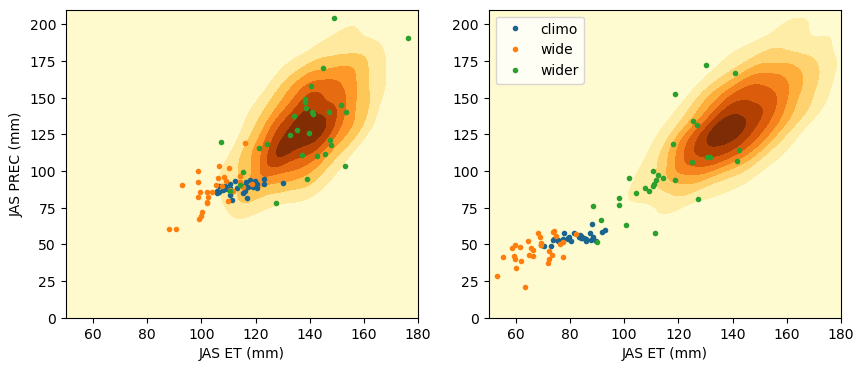

In [96]:
i=0
plt.figure(figsize=[10,4])
for x,y,xc,yc in zip(xs,ys,xcs,ycs):
    i+=1
    plt.subplot(120+i)
    cplot(x,y,xc,yc,xmin, xmax, ymin, ymax)

for i,yr in enumerate(wide.year):
    plt.subplot(121+i)
    plt.plot(cfs[v1]*wide[v1].sel(year=yr).values,
             cfs[v2]*wide[v2].sel(year=yr).values,'C{}.'.format(1))

for i,yr in enumerate(wide.year):
    plt.subplot(121+i)
    plt.plot(cfs[v1]*wider[v1].sel(year=yr).values,
             cfs[v2]*wider[v2].sel(year=yr).values,'C{}.'.format(2))
    plt.xlabel('JAS ET (mm)')
    if i==0:
        plt.ylabel('JAS PREC (mm)')
        

plt.legend(['climo','wide','wider'],loc=2);
plt.savefig('../figs/contours/wide_et_prec.png',dpi=300,bbox_inches='tight')

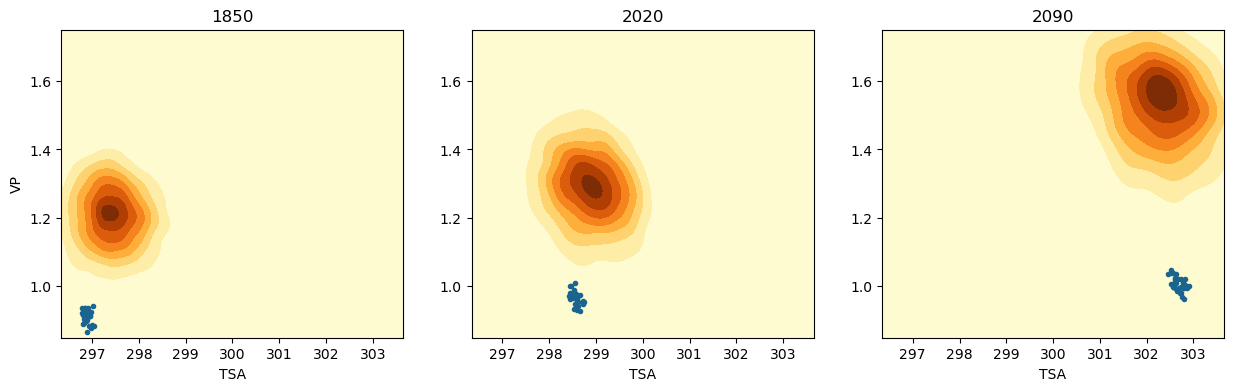

In [27]:
xs,ys,xcs,ycs,yrs=cplot3('TSA','VP',cce)

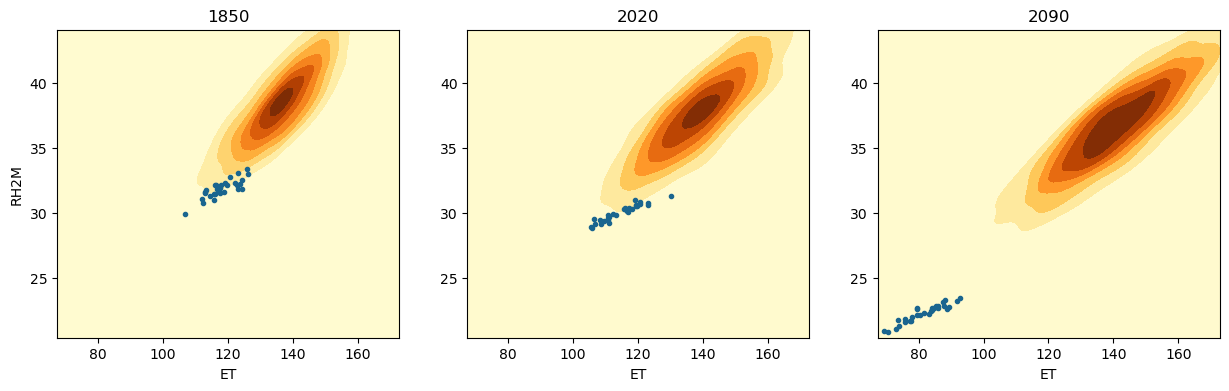

In [56]:
xs,ys,xcs,ycs,yrs=cplot3('ET','RH2M',climo)

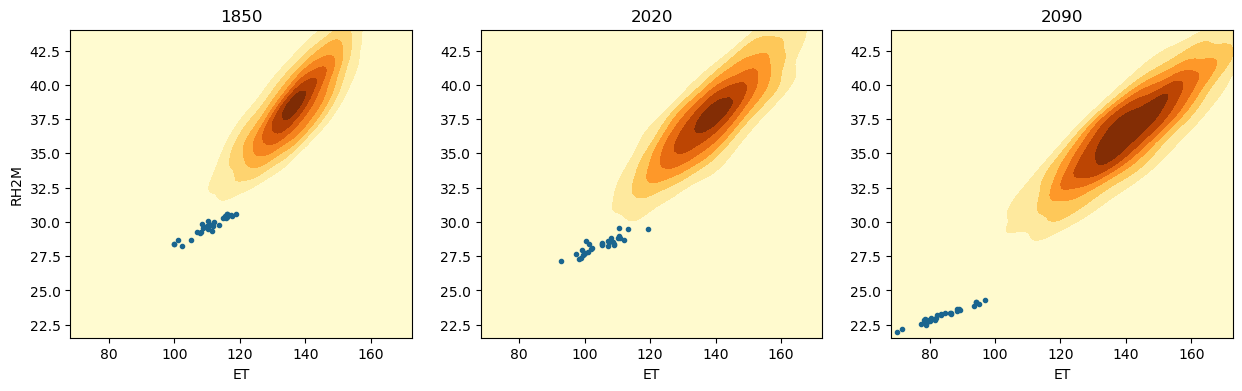

In [55]:
xs,ys,xcs,ycs,yrs=cplot3('ET','RH2M',cce)

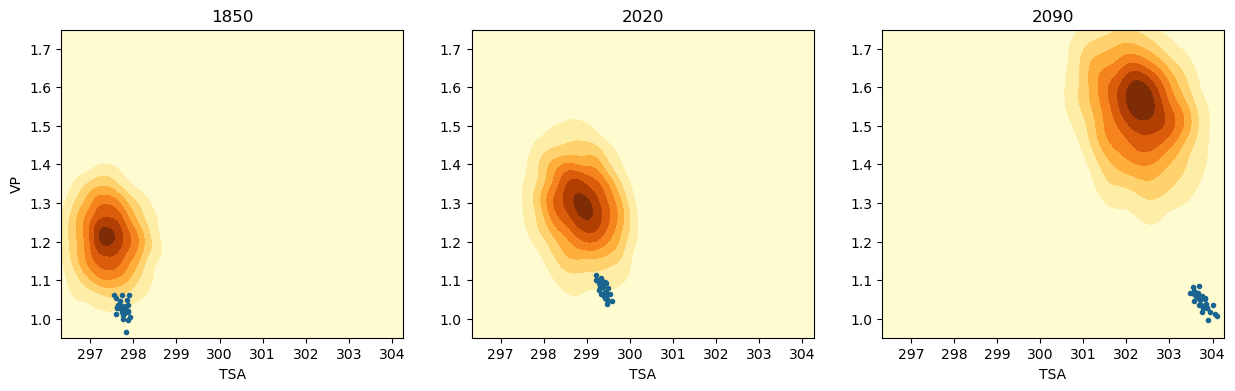

In [52]:
xs,ys,xcs,ycs,yrs=cplot3('TSA','VP',climo)

In [51]:
for x,y,xc,yc in zip(xs,ys,xcs,ycs):
    m,b,r,p,stderr=stats.linregress(x,y)
    mc,b,rc,p,stderr=stats.linregress(xc,yc)
    print(np.round(xc.min(),1),
          np.round(xc.max(),1),
          int(np.round(1000*m)),
          int(np.round(1000*mc)),
          np.round(r**2,2),np.round(rc**2,2))
    

297.5 297.9 -10 -65 0.0 0.1
299.2 299.6 -27 -160 0.03 0.5
303.5 304.1 -39 -108 0.05 0.6


In [35]:
for x,y in zip(xcs,ycs):
    m,b,r,p,stderr=stats.linregress(x,y)
    print(np.round(r**2,2))
    

0.28
0.65
0.78


In [29]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None, alternative='two-sided')
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension. In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    alternative : {'two-sided', 'less', 'greater'}, optional
        Defines the alternative hypothesis. Default is 'two-sided'.
        The following options are available:
    
        * 'two-sided': the slope of the regression line is nonzero
        * 'less': the slope of the regression line is l

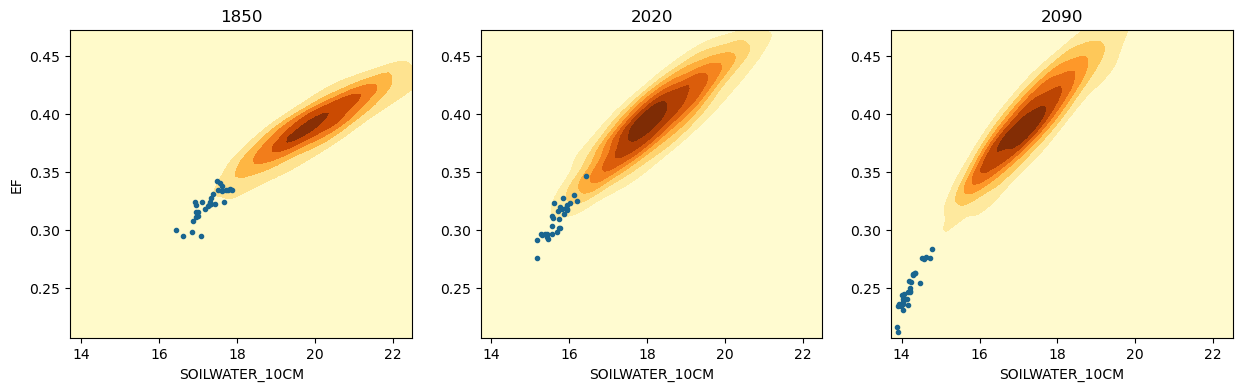

In [8]:
xs,ys,xcs,ycs,yrs=cplot3('SOILWATER_10CM','EF',cce)

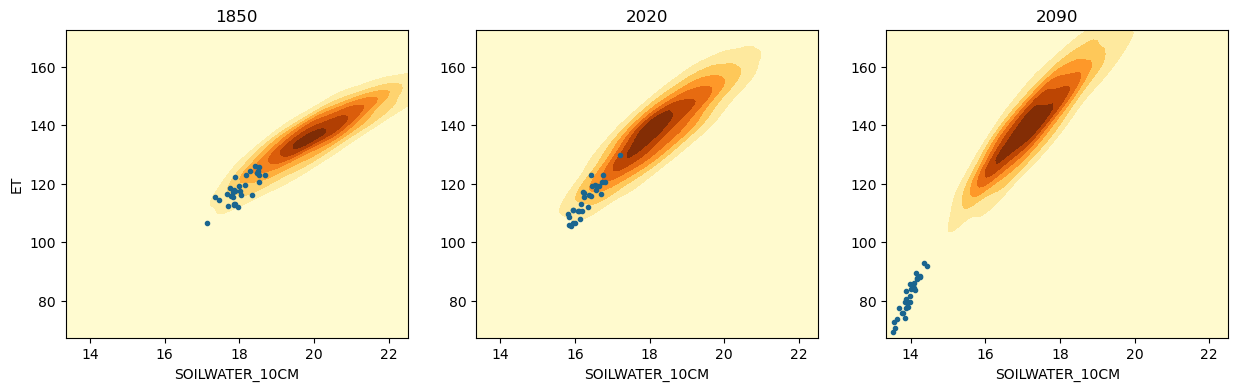

In [42]:
xs,ys,xcs,ycs,yrs=cplot3('SOILWATER_10CM','ET',climo)

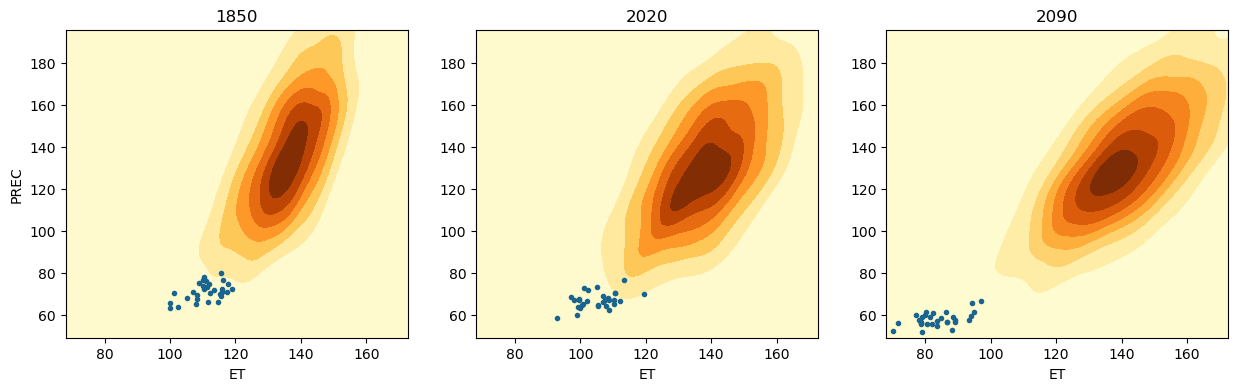

In [43]:
xs,ys,xcs,ycs,yrs=cplot3('ET','PREC',cce)

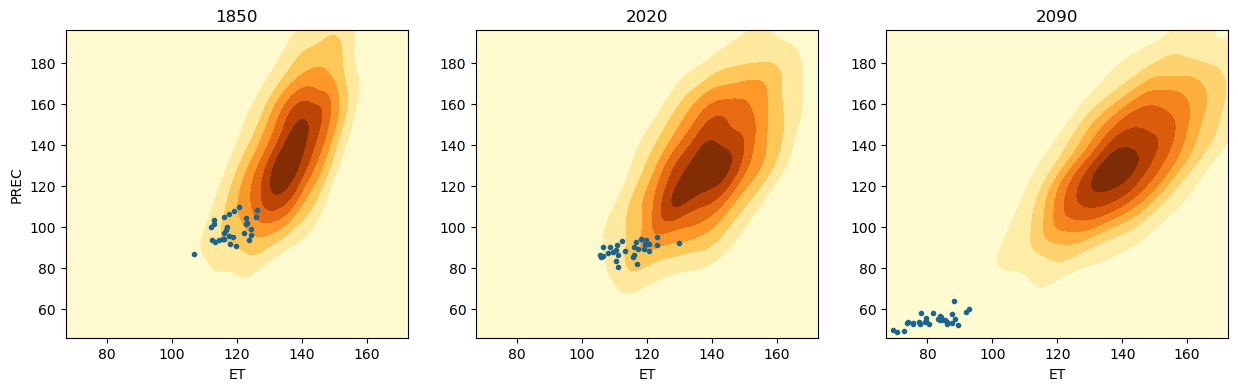

In [44]:
xs,ys,xcs,ycs,yrs=cplot3('ET','PREC',climo)

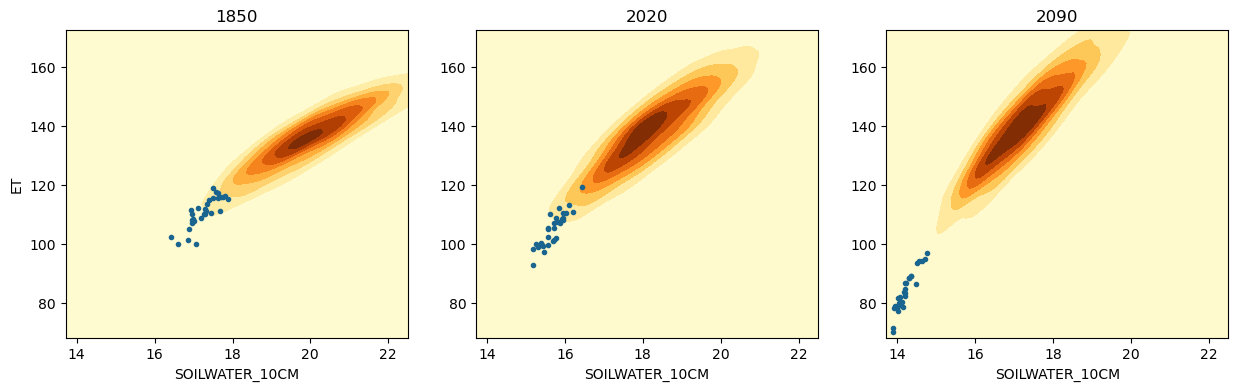

In [11]:
xs,ys,xcs,ycs,yrs=cplot3('SOILWATER_10CM','ET')

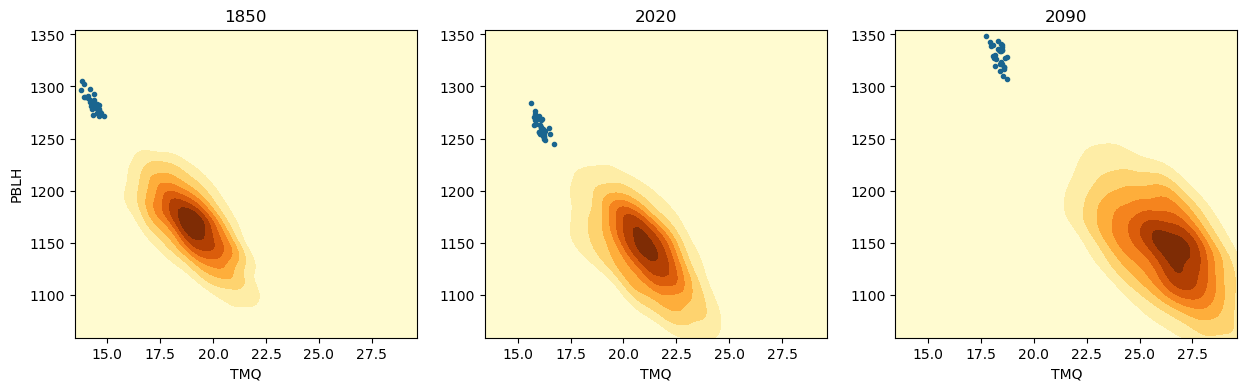

In [14]:
xs,ys,xcs,ycs,yrs=cplot3('TMQ','PBLH')

In [47]:
tmp=xr.open_mfdataset(get_files('2020_era5_i04',cmp='/atm/')[3][:],combine='by_coords')

In [49]:
x=tmp.PRECC/(tmp.PRECC+tmp.PRECL)

In [38]:
la=np.cos(np.deg2rad(tmp.lat))*get_foco(tmp)

In [50]:
get_jas(x,la)

<xarray.DataArray (year: 1)>
array([0.2372937])
Coordinates:
  * year     (year) int64 2020

In [46]:
get_jas(x,la)

<xarray.DataArray (year: 1)>
array([0.24480203])
Coordinates:
  * year     (year) int64 2020

In [51]:
f


'/glade/derecho/scratch/djk2120/postp/jas/cce_era5_i04.nc'

In [176]:
files=sorted(glob.glob(d+v+'*.nc'))
dsets=[xr.open_dataset(f) for f in files]

In [179]:
f='/glade/derecho/scratch/djk2120/postp/jas/TREFHTMX.1950.nc'
xr.open_dataset(f)

<xarray.Dataset>
Dimensions:   (year: 10, ens: 100)
Coordinates:
  * year      (year) int64 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
Dimensions without coordinates: ens
Data variables:
    TREFHTMX  (ens, year) float64 ...

In [181]:
d='/glade/u/home/djk2120/mapp_new/postp/jas/jobs/'
for i,y in enumerate(range(1850,2110,10)):
    with open(d+'job'+str(i+1).zfill(3)+'.txt','w') as f:
        f.write('TREFHTMX,'+str(y))

In [151]:
needs

[1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1980,
 1990,
 2030,
 2040,
 2050,
 2060,
 2070]

In [101]:
tmp=xr.open_dataset(f[0][0])

In [137]:
for v in tmp.data_vars:
    if 'long_name' in tmp[v].attrs:
        if 'energ' in tmp[v].attrs['long_name']:
            print(v)

SL


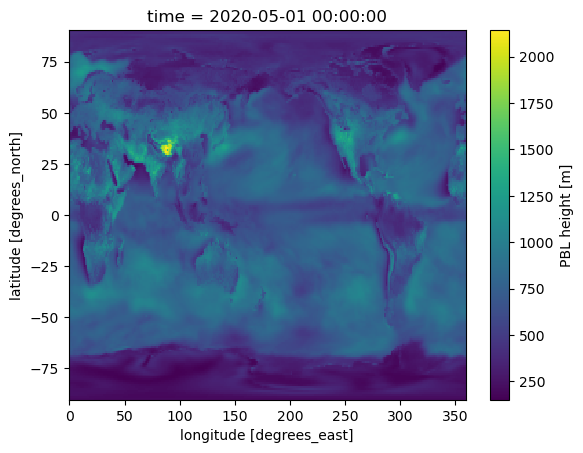

In [141]:
tmp.PBLH.isel(time=0).plot()

In [164]:
tmp.SL

<xarray.DataArray 'SL' (time: 1, lev: 32, lat: 192, lon: 288)>
[1769472 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lev      (lev) float64 3.643 7.595 14.36 24.61 ... 936.2 957.5 976.3 992.6
  * time     (time) object 2020-05-01 00:00:00
Attributes:
    mdims:         1
    units:         J/kg
    long_name:     Liquid water static energy
    cell_methods:  time: mean

In [129]:
x=tmp.PRECC+tmp.PRECL

In [131]:
cf=24*60*60*30

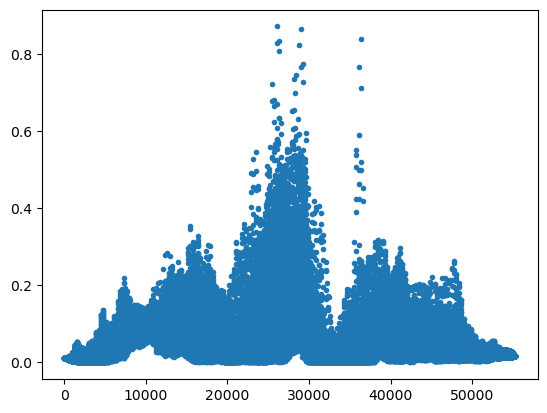

In [132]:
plt.plot(cf*x.values.ravel(),'.')

In [103]:
tmp.TMQ

<xarray.DataArray 'TMQ' (time: 1, lat: 192, lon: 288)>
[55296 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 2020-05-01 00:00:00
Attributes:
    units:         kg/m2
    long_name:     Total (vertically integrated) precipitable water
    cell_methods:  time: mean

In [94]:
help(lens_files)

Help on function lens_files in module utils:

lens_files(datavar, cmp, tape, yr)



In [96]:
lens_files('TREFHTMX','atm','h0',1990)

array(['/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/TREFHTMX/b.e21.BHISTcmip6.f09_g17.LE2-1001.001.cam.h0.TREFHTMX.199001-199912.nc',
       '/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/TREFHTMX/b.e21.BHISTcmip6.f09_g17.LE2-1021.002.cam.h0.TREFHTMX.199001-199912.nc',
       '/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/TREFHTMX/b.e21.BHISTcmip6.f09_g17.LE2-1041.003.cam.h0.TREFHTMX.199001-199912.nc',
       '/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/TREFHTMX/b.e21.BHISTcmip6.f09_g17.LE2-1061.004.cam.h0.TREFHTMX.199001-199912.nc',
       '/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/TREFHTMX/b.e21.BHISTcmip6.f09_g17.LE2-1081.005.cam.h0.TREFHTMX.199001-199912.nc',
       '/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/TREFHTMX/b.e21.BHISTcmip6.f09_g17.LE2-1101.006.cam.h0.TREFHTMX.199001-199912.nc',
       '/glade/campaign/cgd/cesm/CESM2-L

In [93]:
f=get_files('lens_2020',cmp='/atm/')

KeyError: 'lens_2020'

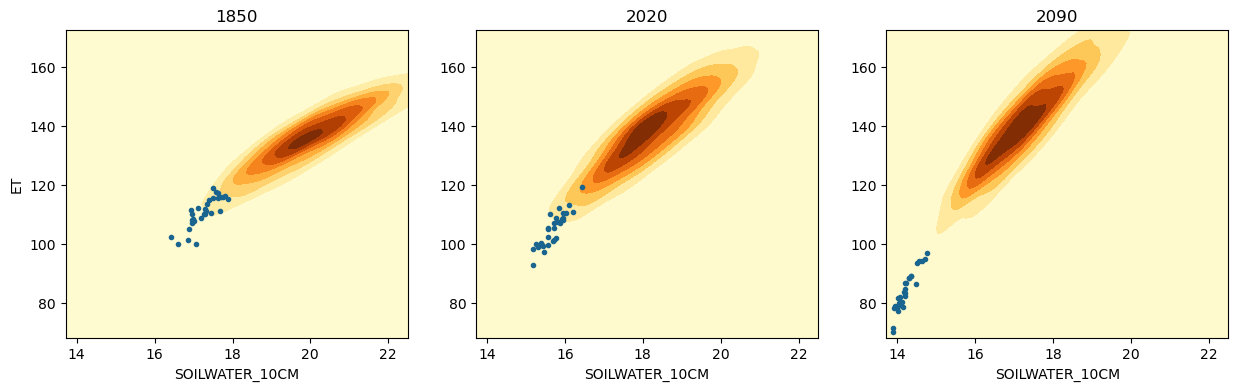

In [89]:
xs,ys,xcs,ycs,yrs=cplot3('SOILWATER_10CM','ET')

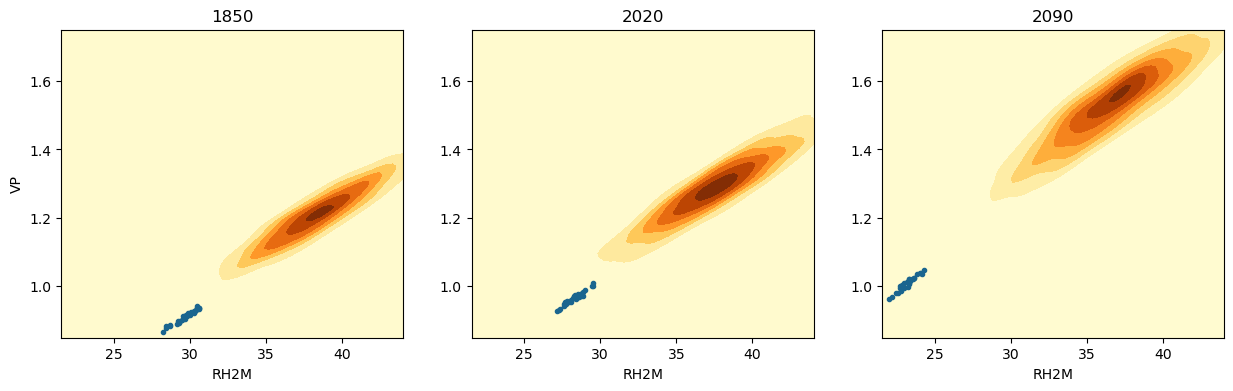

In [90]:
xs,ys,xcs,ycs,yrs=cplot3('RH2M','VP')

In [88]:
for x,y,xc,yc,yr in zip(xs,ys,xcs,ycs,yrs):
    m,b,r,p,stderr=stats.linregress(x,y)
    print('lens'.ljust(5),yr,np.round(m,2),np.round(x.mean(),2),np.round(y.mean(),1),np.round(r**2,2))
    m,b,r,p,stderr=stats.linregress(xc,yc)
    print('cce'.ljust(5),yr,np.round(m,2),np.round(xc.mean(),2),np.round(yc.mean(),1),np.round(r**2,2))

lens  1850 2.13 20.02 38.3 0.82
cce   1850 1.66 17.27 29.7 0.75
lens  2020 2.52 18.28 37.5 0.82
cce   2020 1.77 15.7 28.3 0.72
lens  2090 2.91 17.35 36.7 0.83
cce   2090 2.23 14.21 23.2 0.87


In [68]:
x

array([40.0339946 , 35.36849234, 37.21221585, ..., 34.85734322,
       37.39385143, 42.42811599])

In [7]:
d='/glade/derecho/scratch/djk2120/postp/jas/'
dvs=['SOILWATER_10CM','PREC','ET']
goga=xr.Dataset()
for v in dvs:
    files=sorted(glob.glob(d+'goga.'+v+'.nc'))
    goga[v]=xr.open_mfdataset(files,combine='by_coords')[v]

In [53]:
ds

<xarray.Dataset>
Dimensions:         (year: 251, ens: 100)
Coordinates:
  * year            (year) int64 1850 1851 1852 1853 ... 2097 2098 2099 2100
Dimensions without coordinates: ens
Data variables:
    SOILWATER_10CM  (year, ens) float64 dask.array<chunksize=(10, 100), meta=np.ndarray>
    PREC            (year, ens) float64 dask.array<chunksize=(10, 100), meta=np.ndarray>
    ET              (year, ens) float64 dask.array<chunksize=(10, 100), meta=np.ndarray>

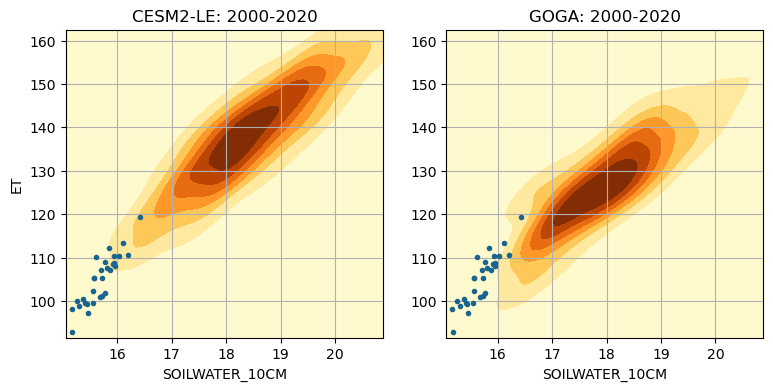

In [50]:
v1='SOILWATER_10CM'
v2='ET'
yr=2020
xcs=[cfs[v1]*cce[v1].sel(year=yr).values for a in [0,0]]
ycs=[cfs[v2]*cce[v2].sel(year=yr).values for a in [0,0]]
yr=2010
xs=[cfs[v1]*ds[v1].sel(year=slice(yr-10,yr+10)).values.ravel() for ds in [ds,goga]]
ys=[cfs[v2]*ds[v2].sel(year=slice(yr-10,yr+10)).values.ravel() for ds in [ds,goga]]
xmin,xmax=findlims(xs,xcs)
ymin,ymax=findlims(ys,ycs)

plt.figure(figsize=[9,4])
i=-1
titles=['CESM2-LE: '+str(yr-10)+'-'+str(yr+10),
        'GOGA: '+str(yr-10)+'-'+str(yr+10)]
for x,y,xc,yc in zip(xs,ys,xcs,ycs):
    i+=1
    plt.subplot(121+i)
    cplot(x,y,xc,yc,xmin,xmax,ymin,ymax)
    plt.title(titles[i])
    plt.grid()
    plt.xlabel(v1)
    if i==0:
        plt.ylabel(v2)

In [51]:
for x,y,xc,yc,yr in zip(xs,ys,xcs,ycs,yrs):
    m,b,r,p,stderr=stats.linregress(x,y)
    print('lens',np.round(m,2),np.round(b,1),np.round(r**2,2))

lens 9.71 -41.3 0.78
lens 9.36 -41.4 0.73


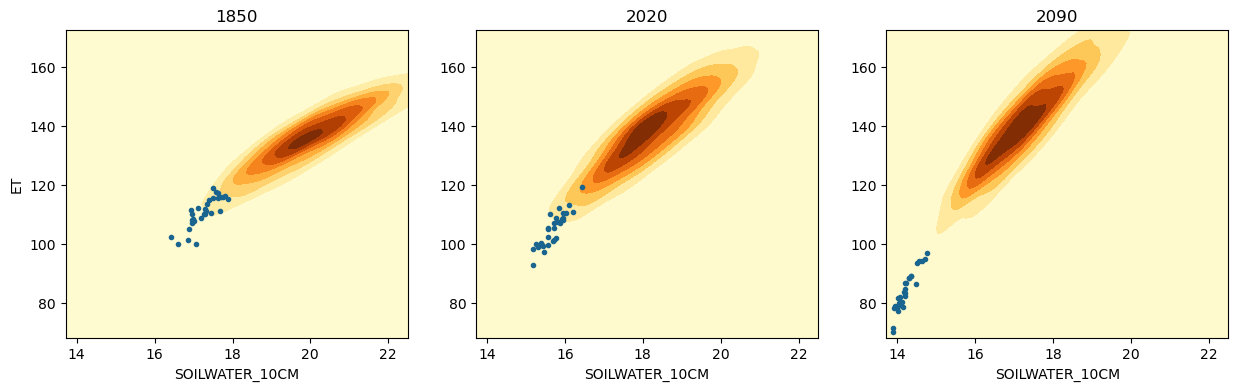

In [6]:
xs,ys,xcs,ycs,yrs=cplot3('SOILWATER_10CM','ET')

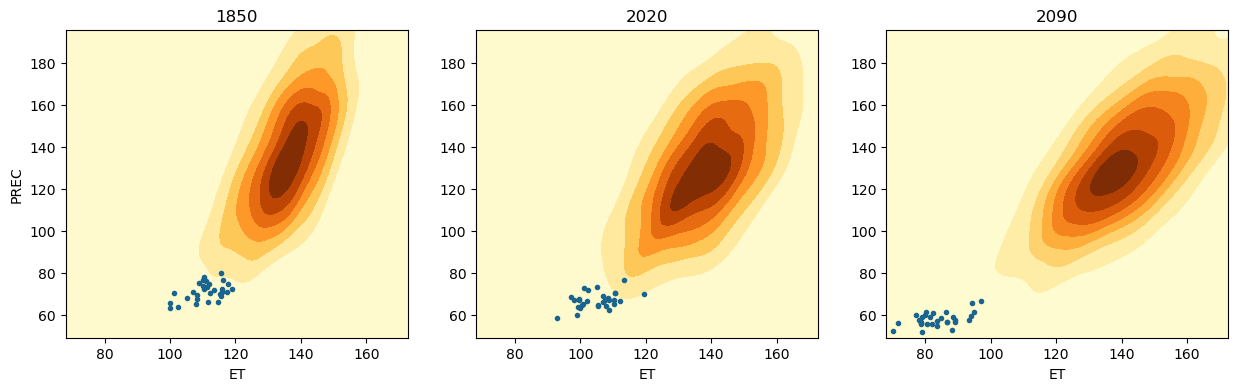

In [66]:
xs,ys,xcs,ycs,yrs=cplot3('ET','PREC')

lens 1850 19.0 0.66
cce 1850 6.0 0.26
lens 2020 19.5 0.67
cce 2020 5.9 0.21
lens 2090 21.9 0.71
cce 2090 8.4 0.37


In [45]:
r**2

0.8382527534718917

In [ ]:
def cplots(v1,v2):
    plt.figure(figsize=[15,4])
    for i,yr in enumerate([1860,2020,2090]):
        x=jas['LENS2'][yr][v1].values.ravel()
        y=jas['LENS2'][yr][v2].values.ravel()

        xc=jas['CCE'][yr][v1]
        yc=jas['CCE'][yr][v2]


        xmin,xmax=findlims(v1,qq=0.05)
        ymin,ymax=findlims(v2,qq=0.05)

        kernel=stats.gaussian_kde(np.array([x,y]))
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]  
        positions = np.vstack([X.ravel(), Y.ravel()])
        Z = np.reshape(kernel(positions).T, X.shape)


        plt.subplot(1,3,i+1)
        plt.contourf(X,Y,Z,cmap='YlOrBr')
        plt.plot(xc,yc,'.',color='#1a658fff');
        plt.xlim([xmin,xmax])
        plt.ylim([ymin,ymax])

        plt.title(yr)

        if i==0:
            plt.ylabel(v2)
        plt.xlabel(v1)
        
        #f='../figs/DTF/contours/'+v1+'_'+v2+'.png'
        #plt.savefig(f,dpi=300,bbox_inches='tight')

In [2]:
client=get_cluster()

In [3]:
dvs=['RAIN','SNOW','TSA','RH2M','QVEGE','QVEGT','QSOIL','SOILWATER_10CM','FSH']
yrs=['1850','2020','2090']
suffs=['_lens','_era5_i04']
exps=[yr+suff for suff in suffs for yr in yrs]

In [4]:
dsets={exp:get_ds(exp,dvs) for exp in exps}
ds=dsets[exps[0]]
la=get_foco(ds)*ds.la

In [9]:
jvs=['ET','PREC','SOILWATER_10CM']
jas={exp:{v:get_jas(dsets[exp][v],la) for v in dvs} for exp in exps}

In [11]:
cfs={'ET':24*60*60*92,
     'PREC':24*60*60*92}

experiment      ET     PREC
1850_era5_i04   110.8  71.3  
2020_era5_i04   105.0  67.0  
2090_era5_i04   84.0   58.0  
1850_lens       113.5  89.9  
2020_lens       112.1  81.2  
2090_lens       104.8  79.4  


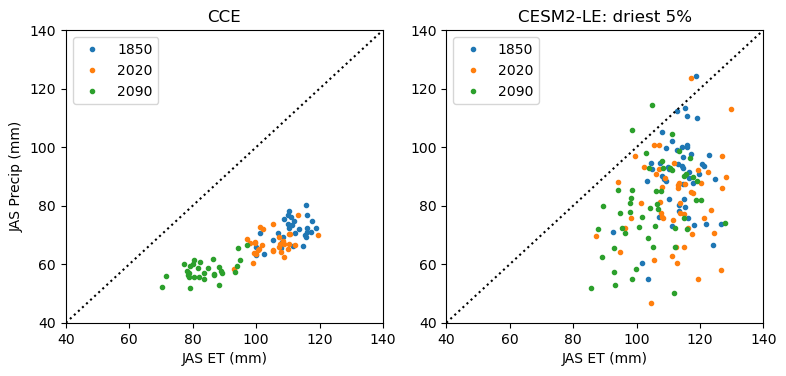

In [42]:
plt.figure(figsize=[9,3.8])
suffs=['_era5_i04','_lens']
titles=['CCE','CESM2-LE: driest 5%']
print('experiment'.ljust(15),'ET'.ljust(6),'PREC')
for j,suff in enumerate(suffs):
    plt.subplot(121+j)
    for i,yr in enumerate(yrs):
        exp=yr+suff
        v1,v2='ET','PREC'
        s=jas[exp]['SOILWATER_10CM'].stack({'ey':['ens','year']})
        x=jas[exp][v1].stack({'ey':['ens','year']})
        y=jas[exp][v2].stack({'ey':['ens','year']})
        if 'lens' in exp:
            qq=s.quantile(0.05)
            ix=s<qq
        else:
            ix=s>0
        print(exp.ljust(15),
              str(np.round(cfs[v1]*x.isel(ey=ix).mean().values,1)).ljust(6),
              str(np.round(cfs[v2]*y.isel(ey=ix).mean().values,1)).ljust(6))
        

        
        plt.plot(cfs[v1]*x.isel(ey=ix),
                 cfs[v2]*y.isel(ey=ix),'.',label=yr);
        xx=[40,140]
        plt.xlim(xx)
        plt.ylim(xx)
        plt.xlabel('JAS ET (mm)')
        if j==0:
            plt.ylabel('JAS Precip (mm)')
        plt.title(titles[j])
    plt.plot(xx,xx,'k:')
    
    plt.legend();
    plt.savefig('../figs/main/scatter_ET_P.pdf',bbox_inches='tight',dpi=300)


In [99]:
v1='ET'
v2='PREC'
for j,suff in enumerate(suffs):
    xs=[]
    ys=[]
    for i,yr in enumerate(yrs):
        exp=yr+suff
        s=jas[exp]['SOILWATER_10CM'].stack({'ey':['ens','year']})
        x=jas[exp][v1].stack({'ey':['ens','year']})
        y=jas[exp][v2].stack({'ey':['ens','year']})
        if 'lens' in exp:
            qq=s.quantile(0.05)
            ix=s<qq
        else:
            ix=s>0
        xs.append(x.isel(ey=ix))
        ys.append(y.isel(ey=ix))
    for i,yr in enumerate(yrs):
        exp=yr+suff
        xm=str(np.round(cfs[v1]*xs[i].mean().values,1))
        ym=str(np.round(cfs[v2]*ys[i].mean().values,1))
        sigs={'x':[],'y':[]}
        for ab,k in enumerate(np.arange(3)[np.arange(3)!=i]):
            p=stats.ttest_ind(xs[i],xs[k]).pvalue
            sigs['x'].append(p<0.05)
            p=stats.ttest_ind(ys[i],ys[k]).pvalue
            sigs['y'].append(p<0.05)
        print(exp.ljust(15),(xm+sigchar(sigs['x'])).ljust(8),ym+sigchar(sigs['y']))
        

1850_era5_i04   110.8*   71.3*
2020_era5_i04   105.0*   67.0*
2090_era5_i04   84.0*    58.0*
1850_lens       113.5v   89.9*
2020_lens       112.1v   81.2^
2090_lens       104.8*   79.4^


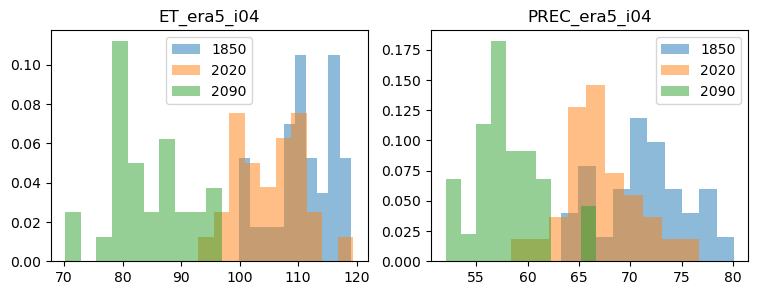

In [112]:
suff='_era5_i04'
plt.figure(figsize=[9,3])
for i,v in enumerate(['ET','PREC']):
    plt.subplot(121+i)
    for yr in yrs:
        exp=yr+suff 
        plt.hist(cfs[v]*jas[exp][v].values.ravel(),alpha=0.5,density=True,label=yr);
        plt.legend()
        plt.title(v+suff)

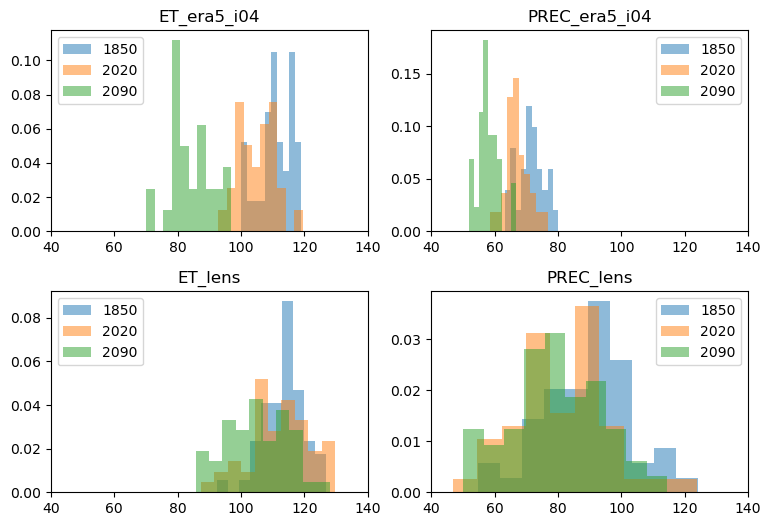

In [122]:
plt.figure(figsize=[9,6])
for j,suff in enumerate(suffs):
    for yr in yrs:
        exp=yr+suff
        s=jas[exp]['SOILWATER_10CM'].stack({'ey':['ens','year']})
        if 'lens' in suff:
            qq=s.quantile(0.05)
            ix=s<qq
        else:
            ix=s>0
        for i,v in enumerate(['ET','PREC']):
            plt.subplot(221+i+2*j)
        
            
            x=cfs[v]*jas[exp][v].stack({'ey':['ens','year']})
            plt.hist(x.isel(ey=ix),alpha=0.5,density=True,label=yr);
            
            plt.title(v+suff)
            plt.legend()
            plt.xlim([40,140])

plt.subplots_adjust(hspace=0.3)

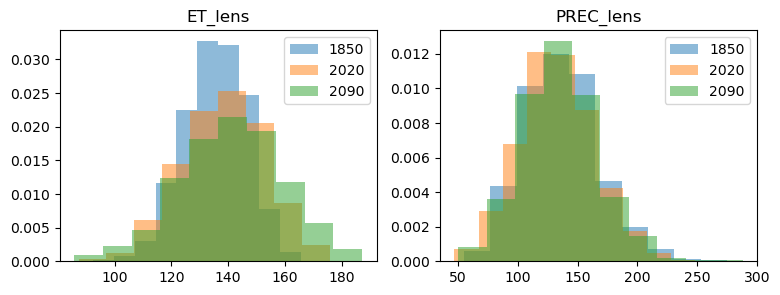

In [111]:
suff='_lens'
plt.figure(figsize=[9,3])
for i,v in enumerate(['ET','PREC']):
    plt.subplot(121+i)
    for yr in yrs:
        exp=yr+suff 
        plt.hist(cfs[v]*jas[exp][v].values.ravel(),alpha=0.5,density=True,label=yr);
        plt.legend()
        plt.title(v+suff)

In [86]:
def sigchar(s):
    if s[0]==True:
        if s[1]==True:
            c='*'
        else:
            c='^'
    elif s[1]==True:
        c='v'
    else:
        c=''
    return c
            